### <font color="Red" size="6"> Juan Esteban Moreno Agudelo</font>

### *1). A calculator company produces a scientific calculator and a graphing calculator. Long-term projections indicate an expected demand of at least 100 scientific and 80 graphing calculators each day. Because of limitations on production capacity, no more than 400 scientific and 340 graphing calculators can be made daily. To satisfy a shipping contract, a total of at least 350 calculators much be shipped each day.*

### *Planteamiento del problema*

<font color="magenta" size="4"> Variables de decisión</font>
#### *$x:$ Producción de calculadoras graficadoras*
#### *$y:$ Producción de calculadoras científicas*

<font color="magenta" size="4"> Función objetivo</font>

#### <center>*$ Z = -2y + 5x$*

<font color="magenta" size="4"> Restricciones </font>
### <center> *$ y \leq 400 \quad \quad \quad \, \,(1)$*
### <center> *$ x \leq 340 \quad \quad \quad \,\, (2)$*
### <center> *$ x \geq 80 \quad \quad \quad \quad (3)$*
### <center> *$ y \geq 100 \quad \quad \quad \,\,\,\, (4)$*
### <center> *$ x + y \geq 350 \quad \quad (5)$*


In [ ]:
!pip install pyomo

     |████████████████████████████████| 9.5MB 5.2MB/s 
     |████████████████████████████████| 51kB 5.7MB/s 
     |████████████████████████████████| 256kB 35.2MB/s 
     |████████████████████████████████| 163kB 28.6MB/s 


In [ ]:
import pandas as pd
import pyomo.environ as pyo
import numpy as np

model = pyo.AbstractModel()

# Parámetros
# model.costoGrap = pyo.Param()
# model.costoScie = pyo.Param()
model.ExpDemScien = pyo.Param()
model.ExpDemGrap = pyo.Param()
model.LimProdGrap = pyo.Param()
model.LimProdScien = pyo.Param()
model.DemContr = pyo.Param()

model.LossScien = pyo.Param()
model.ProfGrap = pyo.Param()

model.x = pyo.Var()
model.y = pyo.Var()

def obj(model):
    return model.LossScien*model.y + model.ProfGrap*model.x
model.objective = pyo.Objective(rule=obj, sense=pyo.maximize)

def constr1(model):
    return model.y <= model.LimProdScien
model.c1 = pyo.Constraint(rule=constr1)

def constr2(model):
    return model.x <= model.LimProdGrap
model.c2 = pyo.Constraint(rule=constr2)

def constr3(model):
    return model.x >= model.ExpDemGrap
model.c3 = pyo.Constraint(rule=constr3)

def constr4(model):
    return model.y >= model.ExpDemScien
model.c4 = pyo.Constraint(rule=constr4)

def constr5(model):
    return model.y + model.x >= model.DemContr
model.c5 = pyo.Constraint(rule=constr5)

In [ ]:
!apt-get install -y -qq coinor-cbc

Selecting previously unselected package coinor-libcoinutils3v5.
(Reading database ... 160980 files and directories currently installed.)
Preparing to unpack .../0-coinor-libcoinutils3v5_2.10.14+repack1-1_amd64.deb ...
Unpacking coinor-libcoinutils3v5 (2.10.14+repack1-1) ...
Selecting previously unselected package coinor-libosi1v5.
Preparing to unpack .../1-coinor-libosi1v5_0.107.9+repack1-1_amd64.deb ...
Unpacking coinor-libosi1v5 (0.107.9+repack1-1) ...
Selecting previously unselected package coinor-libclp1.
Preparing to unpack .../2-coinor-libclp1_1.16.11+repack1-1_amd64.deb ...
Unpacking coinor-libclp1 (1.16.11+repack1-1) ...
Selecting previously unselected package coinor-libcgl1.
Preparing to unpack .../3-coinor-libcgl1_0.59.10+repack1-1_amd64.deb ...
Unpacking coinor-libcgl1 (0.59.10+repack1-1) ...
Selecting previously unselected package coinor-libcbc3.
Preparing to unpack .../4-coinor-libcbc3_2.9.9+repack1-1_amd64.deb ...
Unpacking coinor-libcbc3 (2.9.9+repack1-1) ...
Selecting p

In [ ]:
LossScien = -2
ProfGrap = 5
ExpDemScien = 100
ExpDemGrap = 80
LimProdGrap = 340
LimProdScien = 400
DemContr = 350

input_data = {None: dict(LossScien={None:LossScien}, ProfGrap={None: ProfGrap}, 
                         ExpDemScien={None:ExpDemScien},
                         ExpDemGrap={None:ExpDemGrap},
                         LimProdGrap={None:LimProdGrap},
                         LimProdScien={None:LimProdScien},
                         DemContr={None:DemContr})
}

instance = model.create_instance(input_data)
solver = pyo.SolverFactory('cbc', executable='/usr/bin/cbc')
solver.solve(instance)

{'Problem': [{'Name': 'unknown', 'Lower bound': 1500.0, 'Upper bound': 1500.0, 'Number of objectives': 1, 'Number of constraints': 6, 'Number of variables': 3, 'Number of nonzeros': 0, 'Sense': 'maximize'}], 'Solver': [{'Status': 'ok', 'User time': -1.0, 'System time': 0.0, 'Wallclock time': 0.0, 'Termination condition': 'optimal', 'Termination message': 'Model was solved to optimality (subject to tolerances), and an optimal solution is available.', 'Statistics': {'Branch and bound': {'Number of bounded subproblems': None, 'Number of created subproblems': None}, 'Black box': {'Number of iterations': 0}}, 'Error rc': 0, 'Time': 0.02171158790588379}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

In [ ]:
print(f"Se deben producir {instance.x.value} calculadoras graficadoras")
print(f"Se deben producir {instance.y.value} calculadoras científicas")
print(f"Las ganancias netas serán: {instance.objective.expr()}$")

Se deben producir 340.0 calculadoras graficadoras
Se deben producir 100.0 calculadoras científicas
Las ganancias netas serán: 1500.0$


#***Problema 1 punto (B)***

### *Consideremos la demanda como variables inciertas $d^{sci}$~$N(\mu=100,\, \sigma^{2}=9)$ para la demanda de calculadoras científicas*.

### *Y para las calculadoras graficadoras $d^{gra}$~$Gamma(\lambda=8,\, k=10)$.*

### *Escribir el problema de optimización donde la demanda de las calculadoras puede ser satisfecha con una probabilidad de almenos $1-\epsilon$* 





#***Escritura del problema***

### *$y^{sci}:$ Producción de calculadoras científicas.*
### *$x^{gra}:$ Producción de calculadoras graficadoras.*

### *$d^{sci}:$ Demanda de las calculadoras científicas(aleatoria)*
### *$d^{gra}:$ Demanda de las calculadoras graficadoras(aleatoria)*

### <center> *$\mathbb{P}(d^{sci} \leq x_{sci}) = F_{D^{sci}}(x_{sci})$*
### <center> *$\mathbb{P}(d^{gra} \leq x_{gra}) = F_{D^{gra}}(x_{gra})$*

### *Y esa probabilidad de ocurrencia esta relajada de la siguiente forma:*

### <center>*$F_{D^{sci}}(x_{sci}) \geq 1 - \epsilon \quad \Rightarrow \quad x_{sci} \geq F_{D^{sci}}(1-\epsilon)$*
### <center>*$$F_{D^{gra}}(x_{gra}) \geq 1 - \epsilon \quad \Rightarrow \quad x_{gra} \geq F_{D^{gra}}(1-\epsilon)$$*

### *Función objetivo*
### <center> *$$\max_{x, y \leq 0}\,\, -2y + 5X$$*


### *Restricciones*
### *Relajación de la restricción de demanda(Que se cumpla la demanda casi siempre)*

### <center>*$x + y \geq\, 350 \quad \quad \,(1)$*
### <center> *$ y \leq 400 \quad \quad \, \quad \quad (2)$*
### <center> *$ x \leq 340 \quad \quad \, \quad \quad (3)$*
### <center> *$ y \geq F_{D^{sci}}(1-\epsilon) \quad (4)$*
### <center> *$ x \geq F_{D^{gra}}(1-\epsilon) \quad (5)$*




#***Problema 1 punto (C)***

### *Sea $f_{0}(\epsilon)$ las ganancias resultantes óptimas diarias como una función de $\epsilon$. Utilize un solver para calcular $f_{0}$ para $\epsilon \in [0, 0.2]$.*

In [ ]:
from scipy.stats import norm, gamma, uniform
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt
from pyomo.util.infeasible import log_infeasible_constraints

m = pyo.ConcreteModel()
opt = pyo.SolverFactory("cbc", executable='/usr/bin/cbc')

epsilon = np.linspace(0, 0.2, 100)

lamb, k = 8, 10 # k es el parámetro de forma lamb el de escala
mu, desv = 100, 3
# demScient = gamma.ppf(1-epsilon, a=k, scale=lamb)
# demGraph = norm.ppf(1-epsilon, loc=mu, scale=desv)

# Parámetros
m.demScient = pyo.Param(default=0, mutable=True)
m.demGraph = pyo.Param(default=0, mutable=True)

# demandas aleatorias
m.x = pyo.Var(bounds=(80, 340), doc="Producción de calculadoras graficadoras")
m.y = pyo.Var(bounds=(100, 400), doc="Producción de calculadoras científicas")

def constr1(m):
    return m.x + m.y >= 350
m.c1 = pyo.Constraint(rule=constr1, 
                      doc="Cantidad de producción para cumplir el contrato")
def constr2(m):
    return m.y <= 400
m.c2 = pyo.Constraint(rule=constr2, 
                      doc="Límite superior de producción de científicas")
def constr3(m):
    return m.y <= 340
m.c3 = pyo.Constraint(rule=constr3, 
                      doc="Límite superior de producción de graficadoras")

def constr4(m):
    return m.x >= m.demGraph
m.c4 = pyo.Constraint(rule=constr4, 
        doc="Restricción de tener al menos la demanda esperada aleatoria")

def constr5(m):
    return m.y >= m.demScient 
m.c5 = pyo.Constraint(rule=constr5, 
    doc="Restricción de tener al menos la demanda esperada de esa calculadora")

def obj(m):
    return -2*m.y + 5*m.x
m.objective1 = pyo.Objective(rule=obj, sense=pyo.maximize)


In [ ]:
# Actualizamos los parámetros mutables de la demanda de las calculadoras
expectedValue = []
for eps in np.linspace(0.0001, 0.2, 100):
    m.demGraph = gamma.ppf(1-eps, a=k, scale=lamb)
    m.demScient = norm.ppf(1-eps, loc=mu, scale=desv)
    results = opt.solve(m)
    log_infeasible_constraints(m)

    # Ganancias segun el riesgo
    expectedValue.append(m.objective1.expr())

Text(0.5, 0, 'Riesgo [$\\epsilon$]')

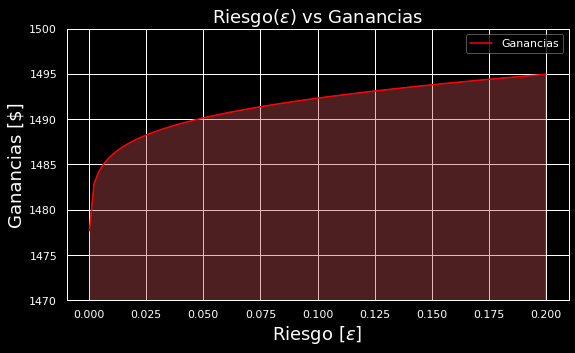

In [ ]:
plt.style.use('dark_background')
plt.figure(figsize=(9, 5))
plt.plot(np.linspace(0.0001, 0.2, 100), expectedValue, label="Ganancias", color="red")
plt.fill_between(np.linspace(0.0001, 0.2, 100), expectedValue, facecolor='r', alpha=0.4)
plt.title(r'Riesgo($\epsilon$) vs Ganancias', fontsize=18)
plt.ylim(1470, 1500)
plt.legend()
plt.ylabel("Ganancias [$]", fontsize=18)
plt.xlabel(r"Riesgo [$\epsilon$]", fontsize=18)

### <font color="Red" size="6"> Problema 2</font>
###***In order to ensure optimal health (and thus accurate test results), a lab technician needs to feed the pigs based on a daily diet containing a minimum of 24 grams (g) of fat, 36 g of carbohydrates, and 4 g of protein. But the pigs should be fed no more than five ounces of food a day. Rather than order pig food that is custom-blended, it is cheaper to order Food X and Food Y, and blend them for an optimal mix. Food X contains 8 g of fat, 12 g of carbohydrates, and 2 g of protein per ounce, and costs 0.20$\$$ per ounce. Food Y contains 12 g of fat, 12 g of carbohydrates,and 1 g of protein per ounce, at a cost of 0.30$\$$ per ounce.***


### *información:*
```markdown
               | grasa(gr)| carbohi(gr) | prot(gr) | cost($/onza)|
|--------------|----------|-------------|----------|-------------|
|  dialy diet  |   24     |     36      |    4     | No aplica   |
|--------------|----------|-------------|----------|-------------|
|   comida X   |   8      |     12      |    2     |   0.20      |
|--------------|----------|-------------|----------|-------------|
|   comida Y   |   12     |     12      |    1     |   0.30      |
|--------------|----------|-------------|----------|-------------|
```

### *Cerdos no comen mas de 5 onzas de comida diaria*


### *Planteamiento del problema*

### *Función objetivo: Minimizar el costo*
#### <center> *$ min \quad 0.2X + 0.3Y$*

### *Restricciones para cada nutriente*
#### <center> *$8X + 12Y \geq 24$ (grasa)*
#### <center> *$12X + 12Y \geq 24$ (carbohidratos)*
#### <center> *$2X + Y \geq 4$ (proteina)*


In [ ]:
import os

model = pyo.ConcreteModel()
opt = pyo.SolverFactory("cbc", executable='/usr/bin/cbc')

#Params
costX = 0.2
costY = 0.3
LimGra = 24
LimCarb = 36
LImProt = 4
XgrPerOnzaGr = 8
model.XgrPerOnzaGr = pyo.Param(default=0, mutable=True)
model.perc = pyo.Param(default=0, mutable=True)
XgrPerOnzaCar = 12
XgrPerOnzaPro = 2
YgrPerOnzaGr = 12
YgrPerOnzaCar = 12
YgrPerOnzaPro = 1

#Vars
model.X = pyo.Var(within=pyo.PositiveReals, doc="Cantidad de la comida X")
model.Y = pyo.Var(within=pyo.PositiveReals, doc="Cantidad de la comida Y")

#Constraints
def objective(model):
    return costX*model.X + costY*model.Y
model.obj = pyo.Objective(rule=objective, sense=pyo.minimize)

def cons1(model):
    # return XgrPerOnzaGr*model.X + YgrPerOnzaGr*model.Y >= LimGra
    return (LimGra - YgrPerOnzaGr*model.Y) <= model.XgrPerOnzaGr*model.X
model.c1 = pyo.Constraint(rule=cons1)

def cons2(model):
    return XgrPerOnzaCar*model.X + YgrPerOnzaCar*model.Y >= LimCarb
model.c2 = pyo.Constraint(rule=cons2)

def cons3(model):
    return XgrPerOnzaPro*model.X + YgrPerOnzaPro*model.Y >= LImProt
model.c3 = pyo.Constraint(rule=cons3)

os.environ['NEOS_EMAIL'] = 'jesteban.moreno@udea.edu.co'
# results = opt.solve(model)
# opt = pyo.SolverManagerFactory('neos')
# results = opt.solve(model, opt='cplex')

In [ ]:
print(f"La cantidad óptima de X es:{model.X.value} onzas")
print(f"La cantidad óptima de Y es:{model.Y.value} onzas")
print(f"EL costo total es:{model.obj.expr()}$")

La cantidad óptima de X es:3.0 onzas
La cantidad óptima de Y es:0.0 onzas
EL costo total es:0.6000000000000001$


#***Problema 2 punto (B)***

### *La cantidad de carbohidratos en la comida Y es incierta, asumir $a$ ~ $Unif(7, 9)$ gr de grasa.*

### *Encuentre la solución óptima pero considerando la probabilidad de los requerimientos de grasa con un $\epsilon$.*

#### <center> *$\mathbb{P}(aX + 12Y \leq 24) \leq \epsilon$*
#### <center> *$\mathbb{P}(a \leq \frac{24 - 12Y}{X}) \leq \epsilon$*
#### <center> *$\mathbb{P}(a \leq \frac{24 - 12Y}{X}) \leq \epsilon$*
#### <center> *$F_{A}(\frac{24 - 12Y}{X}) \leq \epsilon$*
#### <center> *$\frac{24 - 12Y}{X} \leq\, $  percentil $\epsilon$*


[]

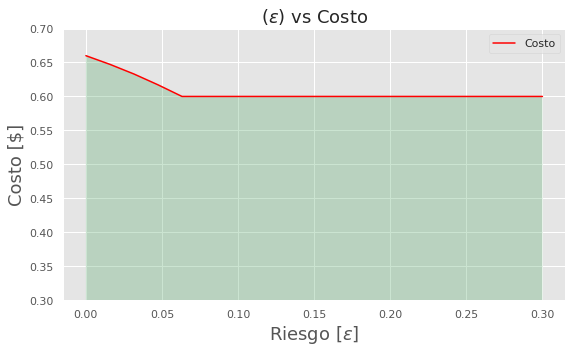

In [ ]:
costo = []
epsilons = np.linspace(0, 0.3, 20)
for epsilon in epsilons:
    model.XgrPerOnzaGr = uniform.ppf(epsilon, loc=7, scale=16)
    results = opt.solve(model)
    costo.append(model.obj.expr())


plt.style.use('ggplot')
plt.figure(figsize=(9, 5))
plt.plot(epsilons, costo, label="Costo", color="red")
plt.fill_between(epsilons, costo, facecolor='g', alpha=0.3)
plt.title(r'($\epsilon$) vs Costo', fontsize=18)
plt.ylim(0.3, 0.7)
plt.legend()
plt.ylabel("Costo [$]", fontsize=18)
plt.xlabel(r"Riesgo [$\epsilon$]", fontsize=18)
plt.plot()


### *Puede verse que a medida que el riesgo es más alto, el costo aumenta como se observa en la figura, para luego disminuir conforme el riesgo disminuye*

#***Problema 2 punto (C)***

### *La cantidad de carbohidratos en la comida Y nombrada b es incierta, asuma: b ~ $Unif(10,14)g$ de carbohidratos por onza.*

### *Encuentre la solución óptima nuevamente considerando que la probabilidad de alimentar los cerdos con menos de 36gr de carbohidratos es al menos $\epsilon$.

#### <center> *$\mathbb{P}(12X + bY \leq 36) \leq \epsilon$*
#### <center> *$\mathbb{P}(b \leq \frac{36 - 12X}{Y}) \leq \epsilon$*
#### <center> *$F_{B}(\frac{36 - 12X}{Y}) \leq \epsilon$*
#### <center> *$\frac{36 - 12X}{Y} \leq\, $  percentil $\epsilon$*


In [ ]:
import os

model = pyo.ConcreteModel()
opt = pyo.SolverFactory("cbc", executable='/usr/bin/cbc')

#Params
costX = 0.2
costY = 0.3
LimGra = 24
LimCarb = 36
LImProt = 4
XgrPerOnzaGr = 8
model.XgrPerOnzaGr = pyo.Param(default=0, mutable=True)
model.YgrPerOnzaCar = pyo.Param(default=0, mutable=True)
XgrPerOnzaCar = 12
XgrPerOnzaPro = 2
YgrPerOnzaGr = 12
YgrPerOnzaCar = 12
YgrPerOnzaPro = 1

#Vars
model.X = pyo.Var(within=pyo.PositiveReals, doc="Cantidad de la comida X")
model.Y = pyo.Var(within=pyo.PositiveReals, doc="Cantidad de la comida Y")

#Constraints
def objective(model):
    return costX*model.X + costY*model.Y
model.obj = pyo.Objective(rule=objective, sense=pyo.minimize)

def cons1(model):
    return XgrPerOnzaGr*model.X + YgrPerOnzaGr*model.Y >= LimGra
    #return (LimGra - YgrPerOnzaGr*model.Y) <= model.XgrPerOnzaGr*model.X
model.c1 = pyo.Constraint(rule=cons1)

def cons2(model):
    #return XgrPerOnzaCar*model.X + YgrPerOnzaCar*model.Y >= LimCarb
    return (LimCarb - XgrPerOnzaCar*model.X) <= model.Y*model.YgrPerOnzaCar
model.c2 = pyo.Constraint(rule=cons2)

def cons3(model):
    return XgrPerOnzaPro*model.X + YgrPerOnzaPro*model.Y >= LImProt
model.c3 = pyo.Constraint(rule=cons3)


[]

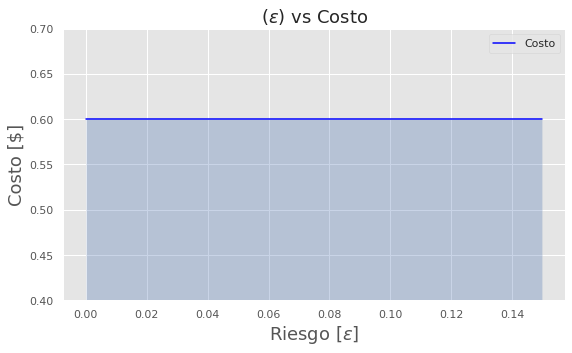

In [ ]:
costo2 = []
epsilonsc = np.linspace(0, 0.15, 20)
for epsilon in epsilonsc:
    model.YgrPerOnzaCar = uniform.ppf(epsilon, loc=10, scale=10 + 4)
    results = opt.solve(model)
    costo2.append(model.obj.expr())

plt.style.use('ggplot')
plt.figure(figsize=(9, 5))
plt.plot(epsilonsc, costo2, label="Costo", color="blue")
plt.fill_between(epsilonsc, costo2, facecolor='b', alpha=0.3)
plt.title(r'($\epsilon$) vs Costo', fontsize=18)
plt.ylim(0.4, 0.7)
plt.legend()
plt.ylabel("Costo [$]", fontsize=18)
plt.xlabel(r"Riesgo [$\epsilon$]", fontsize=18)
plt.plot()

### *La incertidumbre en los carbohidratos en el alimento Y no esta afectando el costo total de suministro de los cerdos, el alimento Y es más costoso, así que el modelo buscará maximizar el uso de todo X y tomar lo que le falte de Y*